# Exercises
In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

* Your goal is to predict the values of single unit properties using the observations from 2017 (`tax_value`).

* As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

* Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [1]:
## Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import pearsonr, spearmanr, mannwhitneyu, f_oneway
from os.path import exists

import env
import wrangle
import explore

Number of observations removed: 239823


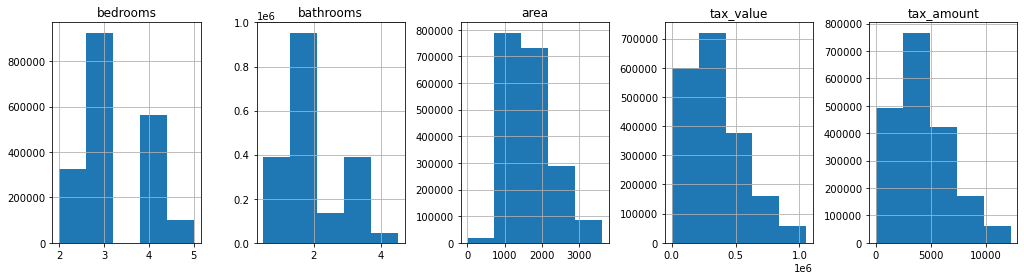

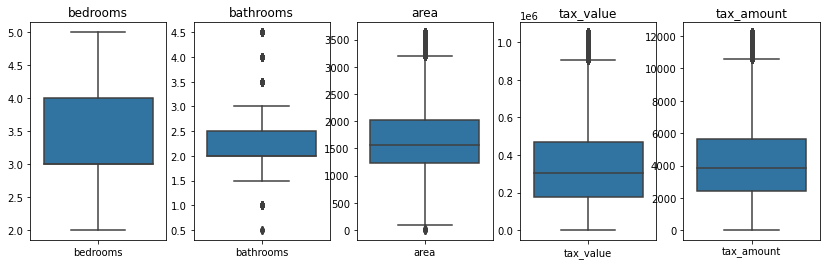

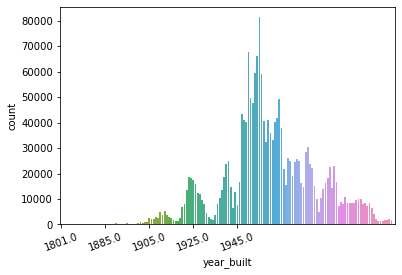

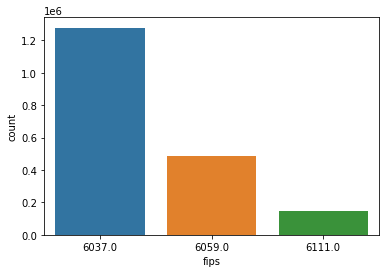

In [2]:
## wrangle --> this will take care of acquire, prep, and split
train, validate, test = wrangle.prep_zillow(wrangle.acquire_zillow())

# Univariate Take Aways
* Area --> Nothing of note
* Bedrooms and Bathrooms --> comparitively few outliers and 
* Lower range of tax_value/tax_amount differ --> Why?
* Housing construction boom post WWII --> are there any other historical reasons for jumps/dips?
* most homes 6037? --> Why?

## Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.
* Do pairplot/pair grid for continuous


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071302 entries, 1888175 to 1495915
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1071302 non-null  float64
 1   bathrooms   1071302 non-null  float64
 2   area        1071302 non-null  float64
 3   tax_value   1071302 non-null  float64
 4   year_built  1071302 non-null  object 
 5   tax_amount  1071302 non-null  float64
 6   fips        1071302 non-null  object 
dtypes: float64(5), object(2)
memory usage: 65.4+ MB


In [4]:
#take a sample of train to use for visuals --> vs == visual sample 
train_vs = train.sample(n=1000)

In [5]:
def plot_variable_pairs (df):
    """ 
    Purpose
        Plot pairwise relationships of zillow dataframe utlizing sample size 1000
        Ignores Categorical columns
    
    Parameters
        df: a dataframe containing zillow real estate data

    Returns
        None
    """

    #initialize a seaborn pairgrid
    g = sns.PairGrid(df.drop(columns=['year_built', 'fips']), diag_sharey=False, corner=True)
    

    #fills out the pairgrid with a regplot
    g.map_lower(sns.regplot, line_kws={'color':'r'})
    return 

In [6]:
# plot_variable_pairs(train_vs)

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.


In [7]:
def plot_categorical_and_continuous_vars(df):
    """ 
    Purpose
        Plot pairwise relationships of zillow dataframe utlizing sample size 1000
        Ignores Categorical columns

    Parameters
        df: a dataframe containing zillow real estate data

    Returns
    None
    """

    categorical_col = ['year_built', 'fips']

    continuous_col = df.drop(columns=['year_built', 'fips']).columns

    g = sns.PairGrid(data=df, 
                y_vars=continuous_col,
                x_vars=categorical_col, 
                height=4, 
                aspect=2)
    g.map(sns.swarmplot)
    g.axes[0,0].set_xticks(np.arange(0,104,20));

    g = sns.PairGrid(data=train_vs, 
                y_vars=continuous_col,
                x_vars=categorical_col, 
                height=4, 
                aspect=2)
    g.map(sns.boxplot)
    g.axes[0,0].set_xticks(np.arange(0,104,20));

    g = sns.PairGrid(data=train_vs, 
                y_vars=continuous_col,
                x_vars=categorical_col, 
                height=4, 
                aspect=2)

    g.map(sns.barplot)
    g.axes[0,0].set_xticks(np.arange(0,104,20));
    
    return

In [8]:
# plot_categorical_and_continuous_vars(train_vs)

## Save the functions you have written to create visualizations in your explore.py file. 
* Rewrite your notebook code so that you are using the functions imported from this file.



In [9]:
#completed and functions moved over

## Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.



### TakeAways: Univariate 
* Area --> Nothing of note
* Bedrooms and Bathrooms --> comparitively few outliers and 
* Lower range of tax_value/tax_amount differ --> Why?
* Housing construction boom post WWII --> are there any other historical reasons for jumps/dips?
* most homes 6037? --> Why?

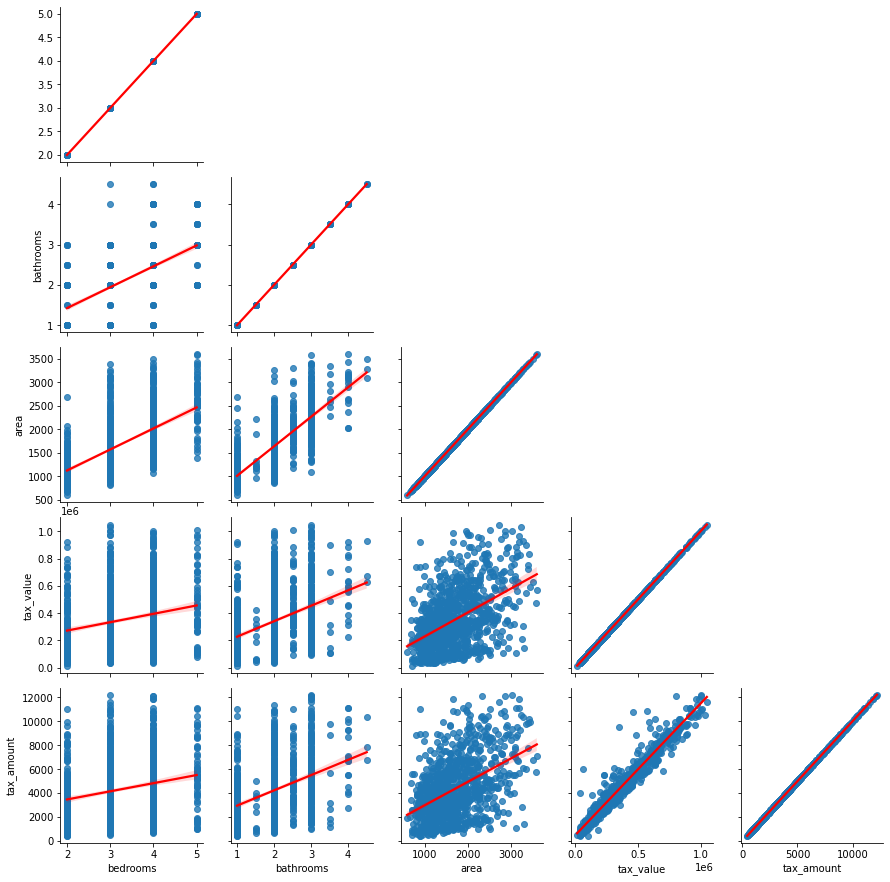

In [10]:
explore.plot_variable_pairs(train_vs)

### Takeaways: Continuous regplot
* `bedrooms`: high correlatino wiht area --> investigate
* `bathrooms`: high correlation with area --> investigate
* `area`: better correlation with tax_value then tax_amount --> writeoffs/downs??

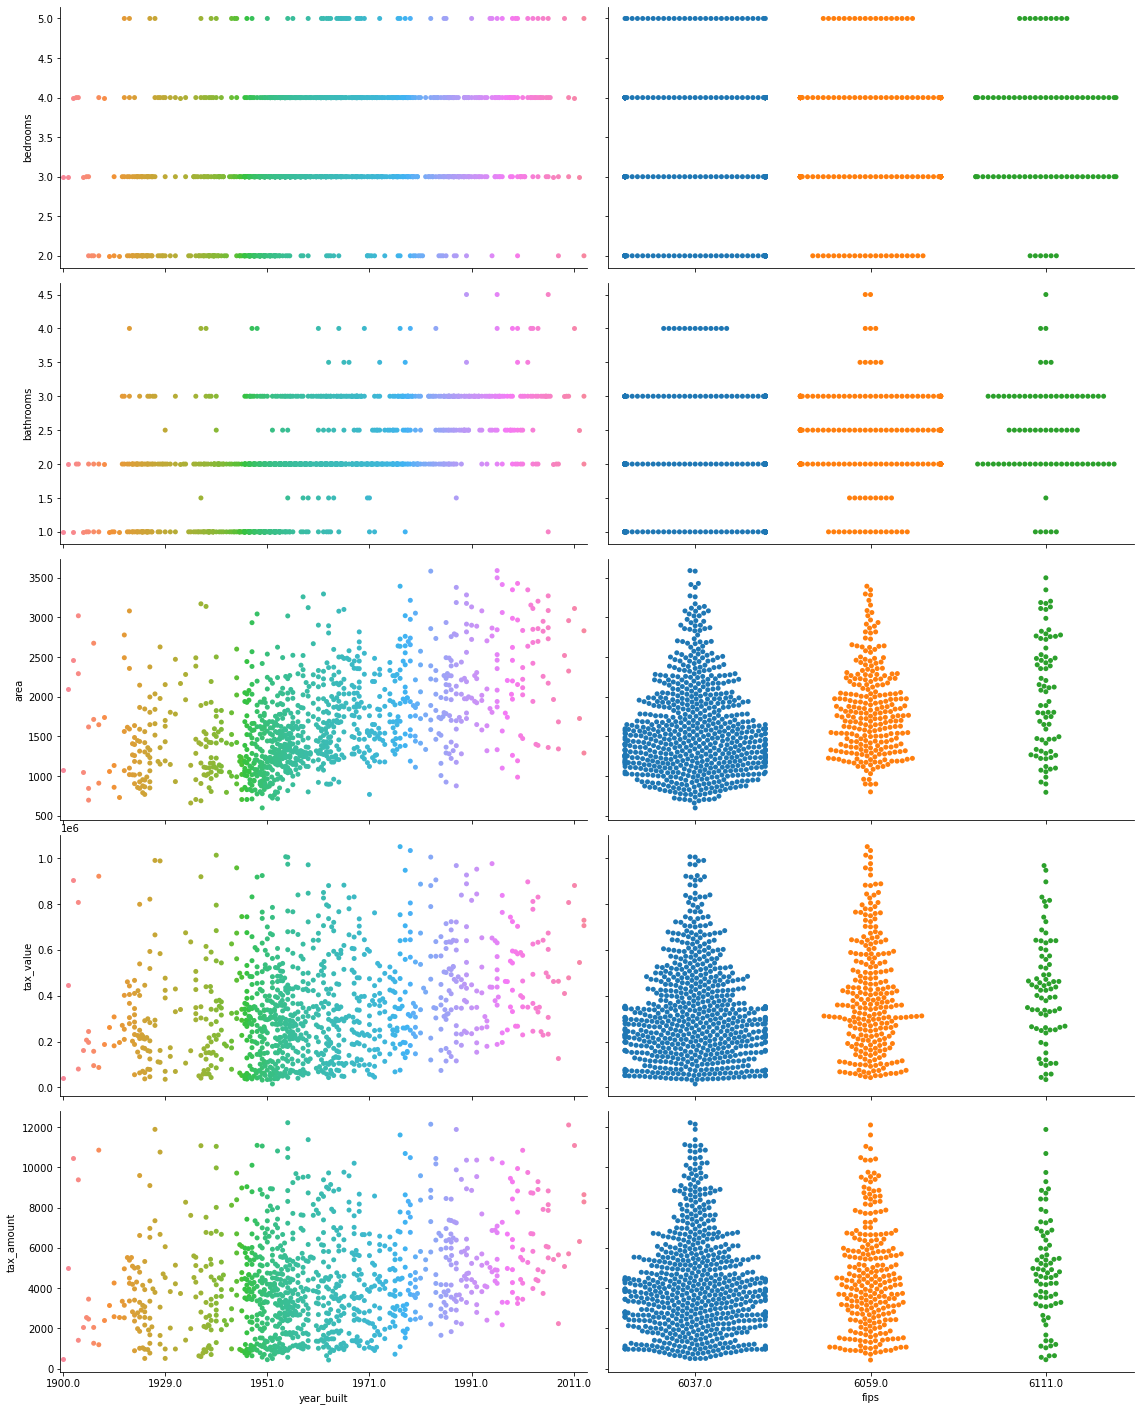

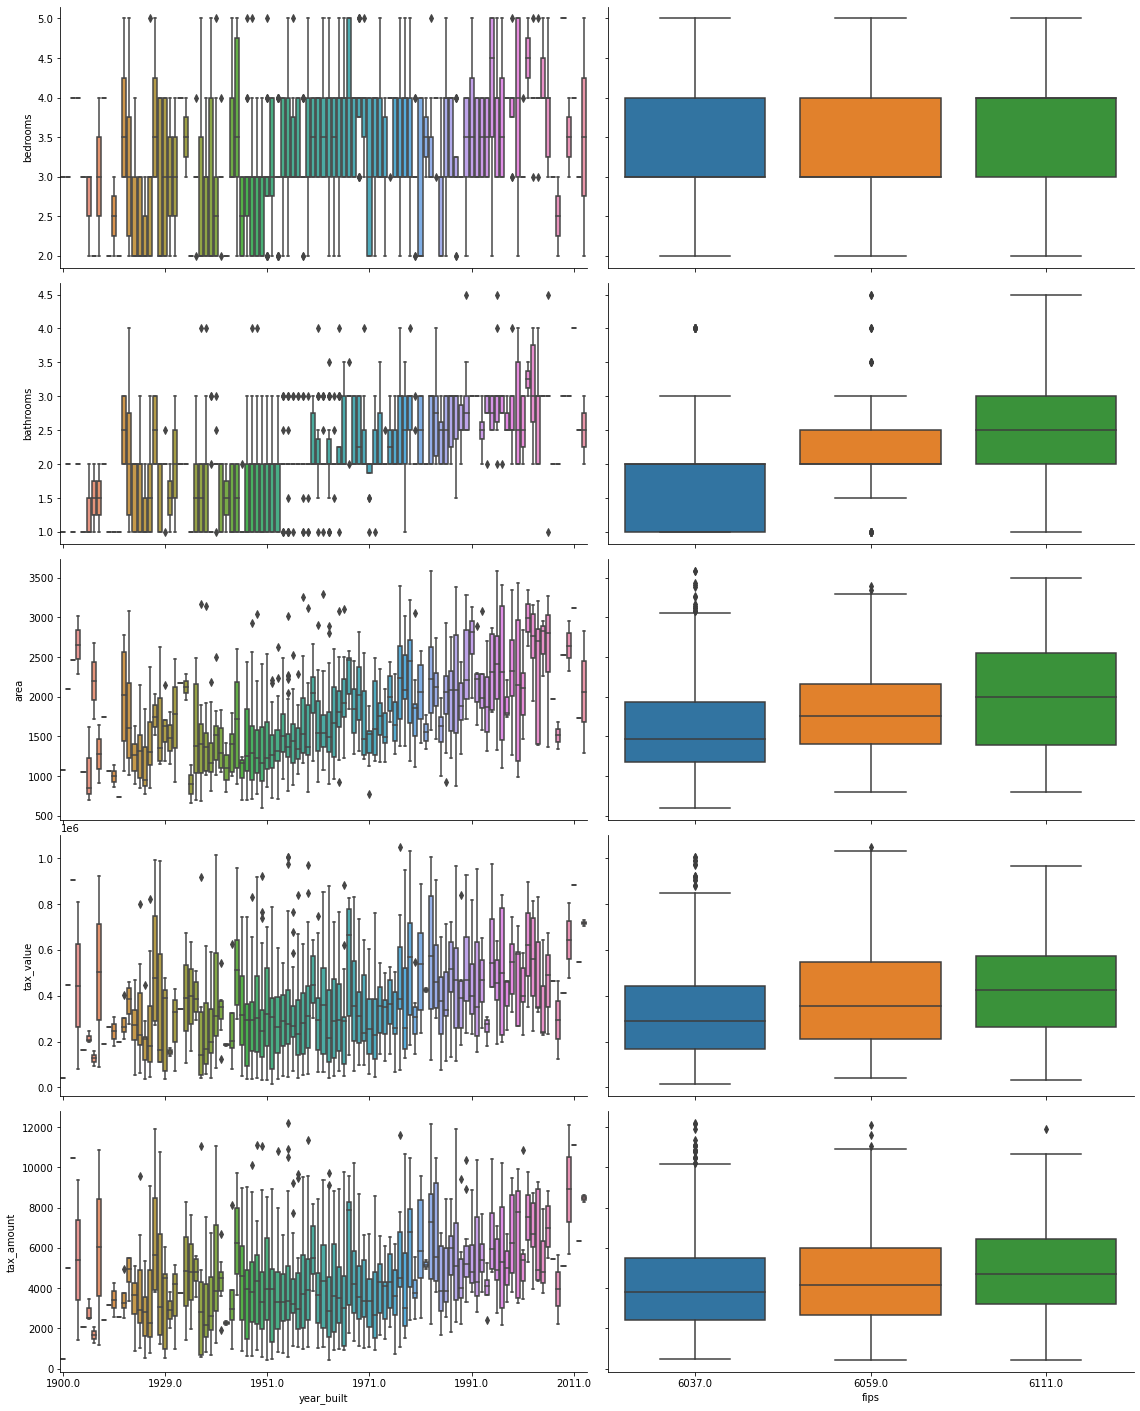

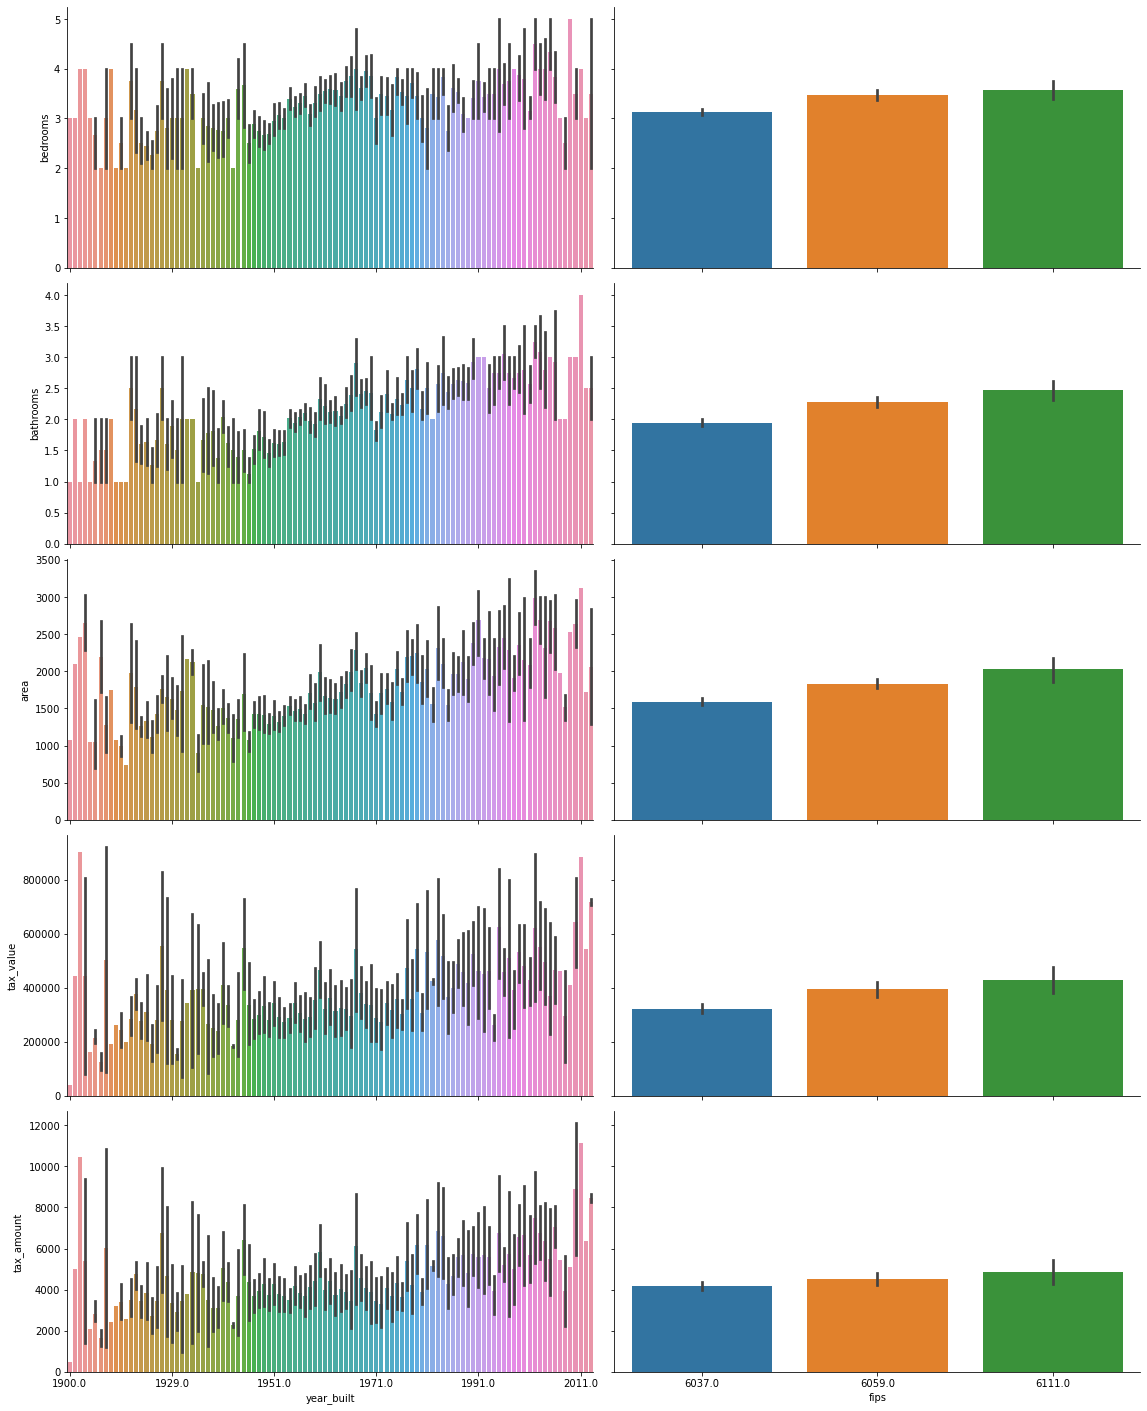

In [11]:
explore.plot_categorical_and_continuous_vars(train_vs)

### Takeaways: 

> years_built
- less modern (1985) homes < 3 bedrooms, and less than < 2 bathrooms
- average area of new homes may have risen in past 30 years --> investigate
- tax amount climbing faster than tax value

> fips
- 6037 bottom heavy in tax_value/tax_amount, as well as largest category -- infer more densely populated
- 6111 and 6059 bedrooms/bathrooms comparable
- 6111 highest mean area


In [12]:
binned_years = pd.cut(train_vs.year_built, np.arange(1880, 2030, 10))


## Come up with some initial hypotheses based on your goal of predicting property value (`tax_value`).



### Hypothesis 1
${H_0}$: There is no relationship between year_built and tax_value  
${H_a}$: There is a relationship between year_built and tax_value  
${\alpha}$: .05

Result: There is enough evidence to reject our null hypothesis. *Test code below*

In [13]:
# area has a high correlation with property value
alpha = .05
r, p = pearsonr(train.year_built, train.tax_value)

print (f'Pearson r value: {r}')
print (f'p-value : {p}')

if p > alpha:
    print(f'Fail to reject the null hypothesis, because our p-value is greater than our alpha.')
else: 
    print(f'There is enough evidence to reject our null hypothesis')

Pearson r value: 0.25460313031681825
p-value : 0.0
There is enough evidence to reject our null hypothesis


### Hypothesis 2
${H_0}$: Homes built after 1980 have equal or less median tax values than those built prior  
${H_a}$: Homes built after 1980 have higher median tax_values than those built prior   
${\alpha}$: .05

Test: Mann-Whitney U
Assumption Check: 
    - Independent --> Yes
    - Ordinal --> Yes
    - Similar shapes --> 

Result: There is enough evidence to reject our null hypothesis. *Test code below*

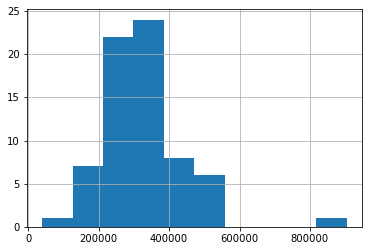

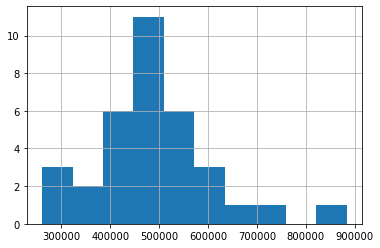

In [14]:
#check shapes first --> will use train_vs sample --> is that okay ?
pre_1980 = train[train.year_built < 1980].groupby('year_built').tax_value.mean()
train_vs[train.year_built < 1980].groupby('year_built').tax_value.mean().hist()
plt.show()

post_1980 = train[train.year_built >= 1980].groupby('year_built').tax_value.mean()
train_vs[train.year_built >= 1980].groupby('year_built').tax_value.mean().hist();

In [15]:
# old vs newer homes --> Homes built post 1980 have greater home values

alpha = .05
u, p = mannwhitneyu(pre_1980, post_1980)

print (f'Mann-Whitney u value: {u}')
print (f'p-value : {p}')

if p > alpha:
    print(f'Fail to reject the null hypothesis, because our p-value is greater than our alpha.')
else: 
    print(f'There is enough evidence to reject our null hypothesis')

Mann-Whitney u value: 198.0
p-value : 2.1312004107814753e-16
There is enough evidence to reject our null hypothesis


### Hypothesis 1
${H_0}$: There is no significant difference in median home value among the different fips designations  
${H_a}$: There is significant difference in median home value among the different fips designations  
${\alpha}$: .05

> Result: There is enough evidence to reject our null hypothesis. **Test code below**

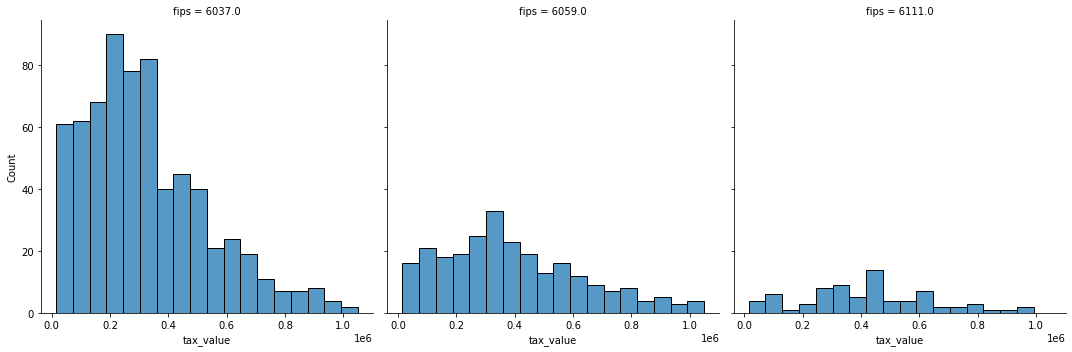

In [16]:
#first visualize histograms of the different categories --> this is 'plotting distributions'
sns.displot(data=train_vs, x='tax_value', col='fips', kind='hist')

In [17]:
#fips 6059 has highest mean value --> for variances what is the threshold for useability?
fips_6037_tax_value = train[train.fips == 6037].tax_value
fips_6059_tax_value = train[train.fips == 6059].tax_value
fips_6111_tax_value = train[train.fips == 6111].tax_value

alpha = .05
f, p = f_oneway(fips_6037_tax_value, fips_6059_tax_value, fips_6111_tax_value)

print (f'ANOVA test statistic value: {f}')
print (f'p-value : {p}')

if p > alpha:
    print(f'Fail to reject the null hypothesis, because our p-value is greater than our alpha.')
else: 
    print(f'There is enough evidence to reject our null hypothesis')

ANOVA test statistic value: 15671.361671860197
p-value : 0.0
There is enough evidence to reject our null hypothesis


### Takeaways
* There is a relationship between home area and tax value
* Homes built post 1980 do have higher tax value
* The fips area have significant different in median tax_value 

## Visualize all combinations of variables in some way.
* Accomplished in cells above


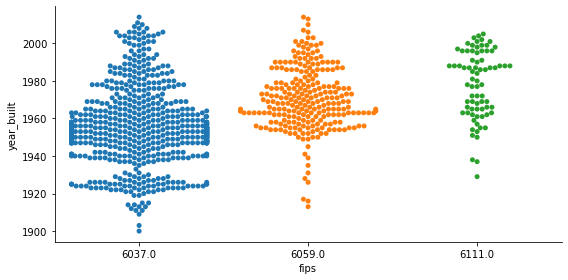

In [18]:
# This viz has now been added to the explore.py
sns.catplot(data=train_vs, x='fips', y='year_built', kind='swarm', height=4, aspect=2)
plt.show()


### Takeaway
* Many 6037 homes built between 1920 and 1960. May have impact on tax value. 

## Run the appropriate statistical tests where needed.
* Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.
* 

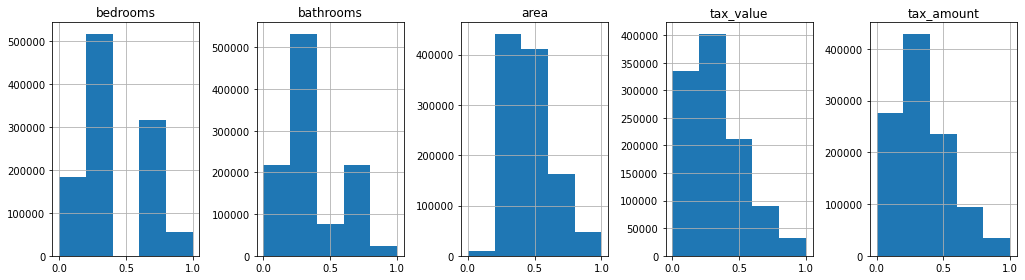

In [19]:
### Scale the data for testing --> no reason not to do it earlier in the prcoess
train_scaled, validate_scaled, test_scaled = wrangle.subset_scaler(train, validate, test)

## What independent variables are correlated with the dependent variable, home value?
* Will use a heatmap


In [124]:
#create numeric column for year built to do correlation tests/heatmap
train['num_year_built'] = train.year_built.astype(int)
train_vs['num_year_built'] = train_vs.year_built.astype(int)
train_scaled['num_year_built'] = train_scaled.year_built.astype(int)


<AxesSubplot:>

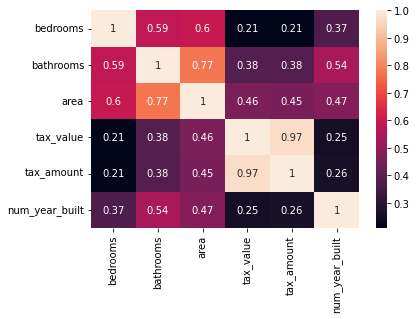

In [21]:
sns.heatmap(data=train.corr(), annot=True)

In [26]:
# area has a high correlation with property value
alpha = .05
for col in train_scaled.drop(columns='tax_value'):
    r, p = pearsonr(train_scaled[col], train_scaled.tax_value)
    if p > alpha:
        result = 'Fail to reject the null hypothesis, because our p-value is greater than our alpha.'
    else: 
        result = 'There is enough evidence to reject our null hypothesis'

    print(f"""
    H_0: There is no significant difference in median home value among {col}
    H_a: There is significant difference in median home value among {col}
    alpha: .05
    Pearson r value: {r}
    p-value : {p}
    {result}
    """)




    H_0: There is no significant difference in median home value among bedrooms
    H_a: There is significant difference in median home value among bedrooms
    alpha: .05
    Pearson r value: 0.20920228565593918
    p-value : 0.0
    There is enough evidence to reject our null hypothesis
    

    H_0: There is no significant difference in median home value among bathrooms
    H_a: There is significant difference in median home value among bathrooms
    alpha: .05
    Pearson r value: 0.3823629998099571
    p-value : 0.0
    There is enough evidence to reject our null hypothesis
    

    H_0: There is no significant difference in median home value among area
    H_a: There is significant difference in median home value among area
    alpha: .05
    Pearson r value: 0.4578765114326841
    p-value : 0.0
    There is enough evidence to reject our null hypothesis
    

    H_0: There is no significant difference in median home value among year_built
    H_a: There is significant differe

### Takeaways 
* Appears to be slight correlation among all numerical categories
* Greatest is with area and tax amount 

## Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?



In [32]:
# area has a high correlation with property value
alpha = .05
for col1 in train_scaled[['bedrooms', 'bathrooms', 'year_built', 'area']].columns:
    for col2 in train_scaled[['bedrooms', 'bathrooms', 'year_built', 'area']].columns:
        r, p = pearsonr(train_scaled[col2], train_scaled[col1])
        if p > alpha:
            result = 'Fail to reject the null hypothesis, because our p-value is greater than our alpha.'
        else: 
            result = 'There is enough evidence to reject our null hypothesis'

        print(f"""
        H_0: There is no significant difference in {col1} among {col2}
        H_a: There is significant difference in {col1} among {col2}
        alpha: .05, Pearson r value: {r}, p-value : {p}
        {result}
        """)




        H_0: There is no significant difference in bedrooms among bedrooms
        H_a: There is significant difference in bedrooms among bedrooms
        alpha: .05, Pearson r value: 0.9999999999833725, p-value : 0.0
        There is enough evidence to reject our null hypothesis
        

        H_0: There is no significant difference in bedrooms among bathrooms
        H_a: There is significant difference in bedrooms among bathrooms
        alpha: .05, Pearson r value: 0.5853735740588764, p-value : 0.0
        There is enough evidence to reject our null hypothesis
        

        H_0: There is no significant difference in bedrooms among year_built
        H_a: There is significant difference in bedrooms among year_built
        alpha: .05, Pearson r value: 0.37142621485905697, p-value : 0.0
        There is enough evidence to reject our null hypothesis
        

        H_0: There is no significant difference in bedrooms among area
        H_a: There is significant difference in 

### Takeaways
* There is correlation among all of them
* The heatmap is confirmed by the testing 

In [23]:
# https://seaborn.pydata.org/examples/faceted_histogram.html?highlight=histogram

## Explore your dataset with any other visualizations you think will be helpful.

### Questions --> based on Takeaways in visualizations
* Is there value in binning (splitting?) years by decade ?? 
* Is there a relationship between tax_value, area, and certain varibales?
* Is there a realationship between tax_value, fips, and area?



#### Is there value in binnng the years by decade??
* Makes visualizations easier


In [66]:
# create list comprehension for decade labels
decades = [f'{decade}s' for decade in np.arange(1800, 2020, 10)]

#apply labels to the data in a new column on both the 
train_scaled['decade'] = pd.cut(train.year_built, np.arange(1800, 2030, 10), labels=decades)

<AxesSubplot:xlabel='decade', ylabel='tax_value'>

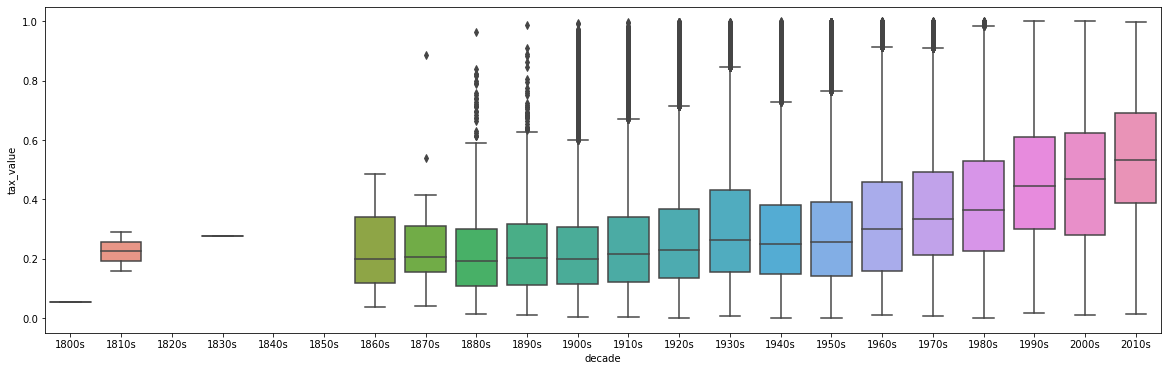

In [67]:
plt.figure(figsize=(20,6))
sns.boxplot(data=train_scaled, x='decade', y='tax_value')

##### Takeaways
* There is value in doing visualizations with decade\
* Will add the column to all subsets  

#### * Is there a relationship between tax_value, area, and certain variables?
* Will view by decade first for each

<Figure size 1008x432 with 0 Axes>

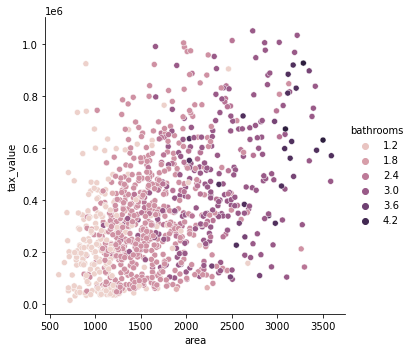

<Figure size 1008x432 with 0 Axes>

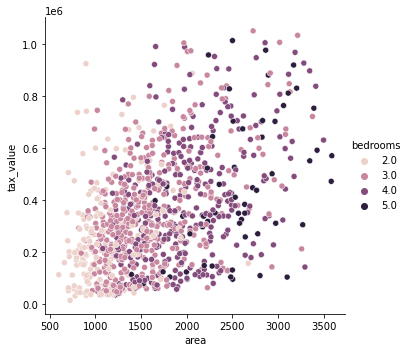

In [107]:

for col in train_vs[['bathrooms', 'bedrooms']].columns:
    plt.figure(figsize=(14,6))
    sns.relplot(data=train_vs, x='area', y='tax_value',
                hue=col)
    plt.show()

##### Takeaways



* not very large discrepencies between the fips zones based on bathrooms or bedrooms.
* nothing very interesting here 

#### * Is there a realationship between tax_value, fips, and area?
* does the value of a home in a given fips zone change based on the size of the house


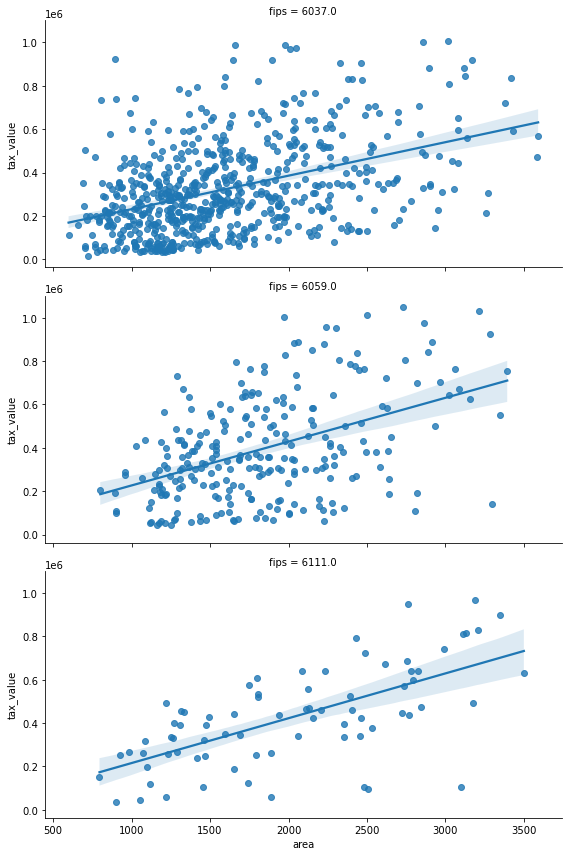

In [118]:
sns.lmplot(data=train_vs, x='area', y='tax_value', row='fips', height=4, aspect=2)

In [152]:
alpha = 0.5
for zone in train_scaled.fips.value_counts().index:
    r, p = pearsonr(train_scaled[train_scaled.fips == zone].area, 
                    train_scaled[train_scaled.fips == zone].tax_value)
    if p > alpha:
        result = 'Fail to reject the null hypothesis, because our p-value is greater than our alpha.'
    else: 
        result = 'There is enough evidence to reject our null hypothesis'

    print(f"""
    Fips Zone {zone}:
    H_0: There is no relationship between area and tax value in the {zone} Fips Zone.
    H_a: There is some relationship between area and tax value in the {zone} Fips Zone.
    alpha: .05, Pearson r value: {r}, p-value : {p}
    {result}
    """)


    Fips Zone 0.0:
    H_0: There is no relationship between area and tax value in the 0.0 Fips Zone.
    H_a: There is some relationship between area and tax value in the 0.0 Fips Zone.
    alpha: .05, Pearson r value: 0.4089632076664146, p-value : 0.0
    There is enough evidence to reject our null hypothesis
    

    Fips Zone 0.29729729729730536:
    H_0: There is no relationship between area and tax value in the 0.29729729729730536 Fips Zone.
    H_a: There is some relationship between area and tax value in the 0.29729729729730536 Fips Zone.
    alpha: .05, Pearson r value: 0.47099384965783164, p-value : 0.0
    There is enough evidence to reject our null hypothesis
    

    Fips Zone 1.0:
    H_0: There is no relationship between area and tax value in the 1.0 Fips Zone.
    H_a: There is some relationship between area and tax value in the 1.0 Fips Zone.
    alpha: .05, Pearson r value: 0.5781421737636047, p-value : 0.0
    There is enough evidence to reject our null hypothesis

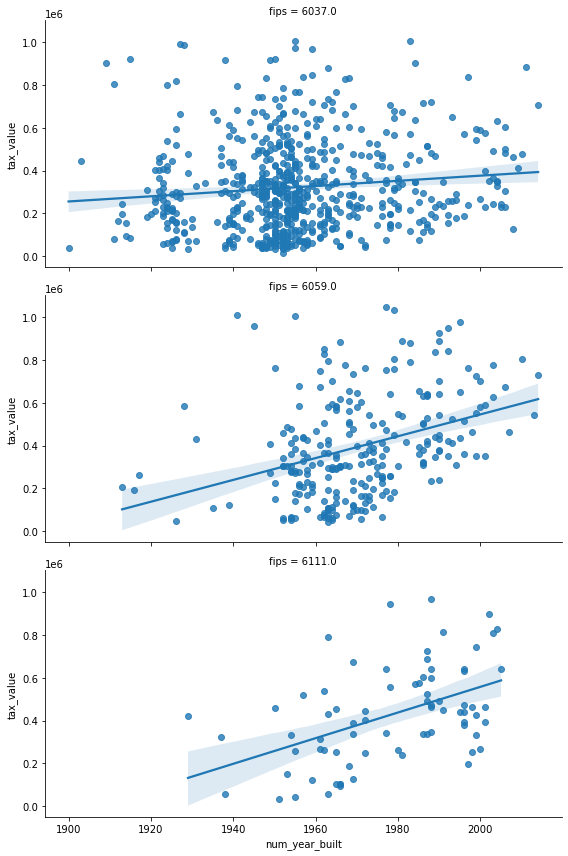

In [125]:
sns.lmplot(data=train_vs, x='num_year_built', y='tax_value', row='fips', height=4, aspect=2)

In [151]:
alpha = 0.5
for zone in train_scaled.fips.value_counts().index:
    r, p = pearsonr(train_scaled[train_scaled.fips == zone].num_year_built, 
                    train_scaled[train_scaled.fips == zone].tax_value)
    if p > alpha:
        result = 'Fail to reject the null hypothesis, because our p-value is greater than our alpha.'
    else: 
        result = 'There is enough evidence to reject our null hypothesis'

    print(f"""
    Fips Zone {zone}:
    H_0: There is no relationship between year built and tax value in the {zone} Fips Zone.
    H_a: There is some relationship between year built and tax value in the {zone} Fips Zone.
    alpha: .05, Pearson r value: {r}, p-value : {p}
    {result}
    """)


    Fips Zone 0.0:
    H_0: There is no relationship between area among area in the 0.0 Fips Zone.
    H_a: There is some relationship between area among area int eh 0.0 Fibs Zone.
    alpha: .05, Pearson r value: -0.004348523905712625, p-value : 0.0002354980341578266
    There is enough evidence to reject our null hypothesis
    

    Fips Zone 0.29729729729730536:
    H_0: There is no relationship between area among area in the 0.29729729729730536 Fips Zone.
    H_a: There is some relationship between area among area int eh 0.29729729729730536 Fibs Zone.
    alpha: .05, Pearson r value: 0.0035959859683865796, p-value : 0.060613706158854086
    There is enough evidence to reject our null hypothesis
    

    Fips Zone 1.0:
    H_0: There is no relationship between area among area in the 1.0 Fips Zone.
    H_a: There is some relationship between area among area int eh 1.0 Fibs Zone.
    alpha: .05, Pearson r value: 0.013115603480241284, p-value : 0.00014588347645578878
    There is en

#### Takeaways
* Tax_value has stronger correlation with year built than area in the fips 6111 zone
    * Previous ANOVA test confirmed there was differences between the tax value of the fips zones
    * Tests showd 6111 and 6059 have close r-values. 6037 does not. 
    * When tested on scaled data 6037 has slightly negative correlation
    * Others have very minimal correlation